In [15]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [16]:
# Paths for data.
Ravdess = "./trainset/ravdess/audio_speech_actors_01-24/"
Crema = "./trainset/cremad/AudioWAV/"
Tess = "./trainset/tess/TESS Toronto emotional speech set data/"
Savee = "./trainset/savee/ALL/"

In [17]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
1,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
2,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
3,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
4,calm,./trainset/ravdess/audio_speech_actors_01-24/A...


In [18]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,happy,./trainset/cremad/AudioWAV/1019_IOM_HAP_XX.wav
1,neutral,./trainset/cremad/AudioWAV/1019_IOM_NEU_XX.wav
2,sad,./trainset/cremad/AudioWAV/1019_IOM_SAD_XX.wav
3,angry,./trainset/cremad/AudioWAV/1019_ITS_ANG_XX.wav
4,disgust,./trainset/cremad/AudioWAV/1019_ITS_DIS_XX.wav


In [19]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        # print(file)
        part = file.split('.')[0]
        # print(part)
        # print(part.split('_')[2])
        part = part.split('_')[-1]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,./trainset/tess/TESS Toronto emotional speech ...
1,angry,./trainset/tess/TESS Toronto emotional speech ...
2,angry,./trainset/tess/TESS Toronto emotional speech ...
3,angry,./trainset/tess/TESS Toronto emotional speech ...
4,angry,./trainset/tess/TESS Toronto emotional speech ...


In [20]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,sad,./trainset/savee/ALL/DC_sa07.wav
1,sad,./trainset/savee/ALL/DC_sa08.wav
2,sad,./trainset/savee/ALL/DC_sa09.wav
3,sad,./trainset/savee/ALL/DC_sa10.wav
4,sad,./trainset/savee/ALL/DC_sa11.wav


In [21]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path_trainset.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
1,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
2,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
3,neutral,./trainset/ravdess/audio_speech_actors_01-24/A...
4,calm,./trainset/ravdess/audio_speech_actors_01-24/A...


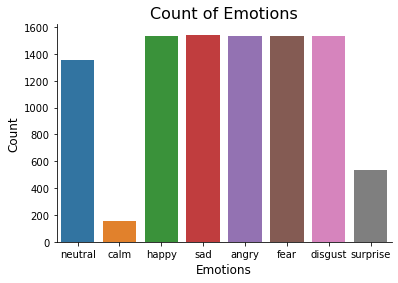

In [22]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [23]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

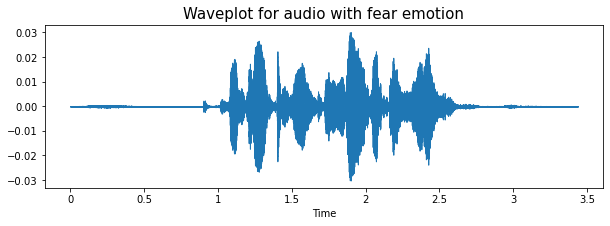

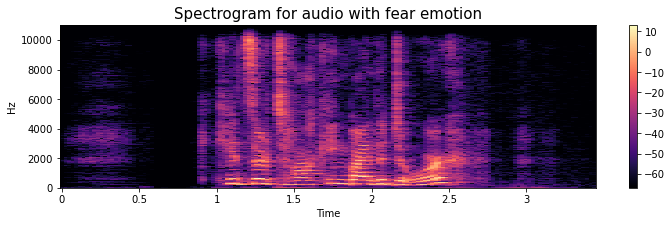

In [24]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
import soundfile
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [25]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [26]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [27]:
from tqdm import tqdm

X, Y = [], []
for path, emotion in tqdm(zip(data_path.Path, data_path.Emotions)):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

9718it [28:41,  5.64it/s]


In [28]:
len(X), len(Y), data_path.Path.shape

(29154, 29154, (9718,))

In [29]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_train.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.309191,0.627918,0.581373,0.631953,0.722411,0.627493,0.665136,0.622326,0.592026,0.646436,...,0.000016,0.000009,0.000012,0.000016,0.000034,0.000023,0.000006,1.665318e-07,2.238974e-09,neutral
1,0.266317,0.647447,0.617845,0.651958,0.741533,0.690169,0.680209,0.620544,0.574914,0.624773,...,0.000016,0.000009,0.000013,0.000017,0.000034,0.000024,0.000006,4.286272e-07,2.661373e-07,neutral
2,0.187334,0.590202,0.597529,0.587395,0.672896,0.675208,0.585603,0.620581,0.580191,0.596872,...,0.000024,0.000004,0.000003,0.000001,0.000005,0.000002,0.000001,4.699898e-08,2.571243e-10,neutral
3,0.181442,0.547213,0.531296,0.639458,0.587223,0.576165,0.671551,0.637666,0.591458,0.606419,...,0.000039,0.000040,0.000152,0.000513,0.000980,0.000364,0.000040,6.251843e-07,3.243000e-09,neutral
4,0.158361,0.541172,0.530813,0.640595,0.593274,0.586583,0.665802,0.628927,0.588682,0.601577,...,0.000039,0.000040,0.000152,0.000513,0.000980,0.000364,0.000040,6.350595e-07,1.372913e-08,neutral
